In [1]:
import os
import numpy as np
import pandas as pd
import zipfile 
import matplotlib.image as image
from sklearn.model_selection import train_test_split
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt




In [88]:
"""def extract(file):
    with zipfile.ZipFile(os.getcwd() + "/Pictures/" + file, 'r') as zip_ref:
        zip_ref.extractall(os.getcwd()+"/Pictures/")
extract("64.zip")
"""

'def extract(file):\n    with zipfile.ZipFile(os.getcwd() + "/Pictures/" + file, \'r\') as zip_ref:\n        zip_ref.extractall(os.getcwd()+"/Pictures/")\nextract("64.zip")\n'

In [15]:
waldo_images = os.listdir(os.getcwd() + "/Pictures/64/augmented")
notwaldo_images = os.listdir(os.getcwd() + "/Pictures/64/notwaldo")
X = []
y = [] 

for img in waldo_images:
    try:
        X.append(image.imread(os.getcwd() + "/Pictures/64/augmented/" + str(img)))
        y.append(1)
    except:
        continue

for img in notwaldo_images:
    X.append(image.imread(os.getcwd() + "/Pictures/64/notwaldo/" + str(img)))
    y.append(0)
X = np.array(X) 
y = np.column_stack(y).T 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

In [19]:
#Model from https://www.tensorflow.org/tutorials/images/cnn
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=10, validation_data = (X_test, y_test))



NameError: name 'X_test' is not defined

In [121]:
model.evaluate(X_val,  y_val, verbose=2)


51/51 - 1s - loss: 0.0596 - accuracy: 0.9919 - 811ms/epoch - 16ms/step


[0.059565220028162, 0.9919404983520508]

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

model.evaluate(X_val,  y_val, verbose=2)


In [2]:

#This is from https://github.com/ThomasADuffy/Whos-Waldo-Capstone-2/blob/master/images/plots_structures/Model_v1.jpg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.15,
    height_shift_range=0.15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=(.7,1.3),
    fill_mode='nearest')
i = 0
gen= datagen.flow_from_directory(
        os.getcwd() + "/Pictures/64/",
        target_size=(64, 64),
        batch_size=1, color_mode='rgb',
    class_mode='binary', shuffle=True, interpolation='nearest',
    save_to_dir= os.getcwd() + "/Pictures/64/augmented",save_prefix="changed")




Found 39 images belonging to 2 classes.


In [3]:
i = 0
while i <= 5338:
    try:
        gen.next()
        i+=1
    except:
        break

In [159]:
gen.next()

(array([[[[0.18039216, 0.16470589, 0.11764707],
          [0.2901961 , 0.2784314 , 0.23529413],
          [0.5764706 , 0.5647059 , 0.5294118 ],
          ...,
          [0.68235296, 0.7176471 , 0.72156864],
          [0.68235296, 0.7176471 , 0.72156864],
          [0.68235296, 0.7176471 , 0.72156864]],
 
         [[0.23137257, 0.23137257, 0.18431373],
          [0.29411766, 0.29803923, 0.2627451 ],
          [0.59607846, 0.6       , 0.5686275 ],
          ...,
          [0.6784314 , 0.7137255 , 0.72156864],
          [0.6784314 , 0.7137255 , 0.72156864],
          [0.6784314 , 0.7137255 , 0.72156864]],
 
         [[0.4039216 , 0.41176474, 0.36862746],
          [0.40784317, 0.427451  , 0.3921569 ],
          [0.627451  , 0.64705884, 0.62352943],
          ...,
          [0.6901961 , 0.70980394, 0.7176471 ],
          [0.6901961 , 0.70980394, 0.7176471 ],
          [0.6901961 , 0.70980394, 0.7176471 ]],
 
         ...,
 
         [[0.60784316, 0.54901963, 0.4784314 ],
          [0.60392

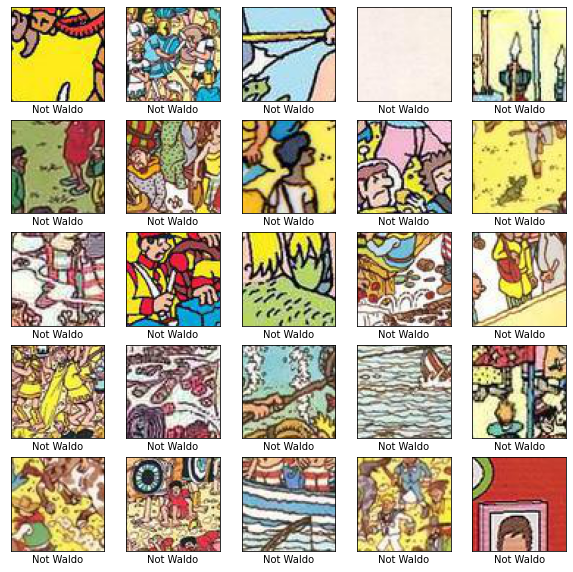

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Activation,Dense,Flatten
from mxnet import np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()
